# Multiple Linear Regression with Python

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                        # To ignore any warnings 
warnings.filterwarnings("ignore")

### Load the data

In [2]:
dataset = pd.read_csv('startups-data.csv')

### Understand the data

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### Visualise data
Let's create some simple plots to check out the data!

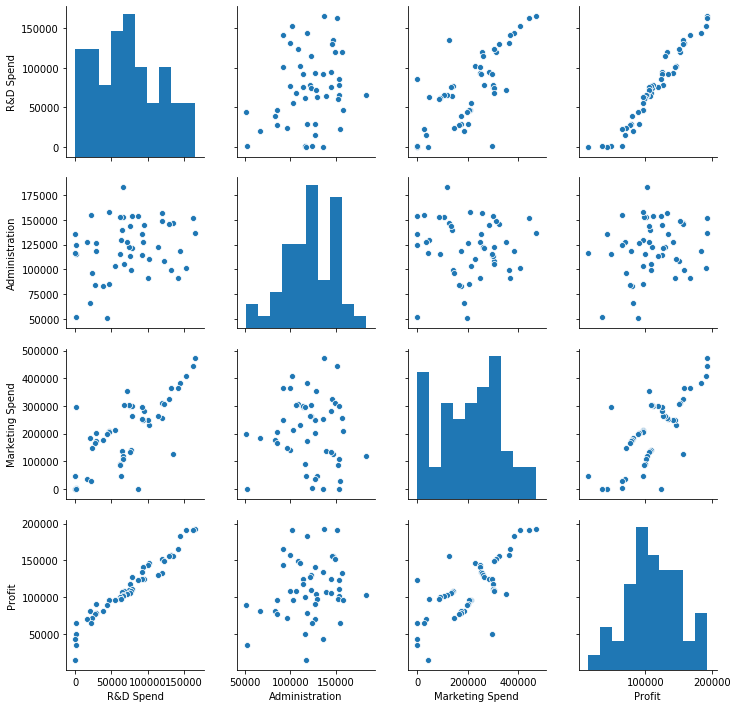

In [7]:
sns.pairplot(dataset)

Missing data

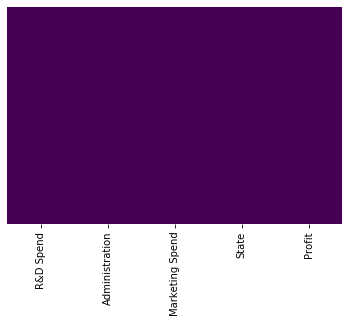

In [8]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

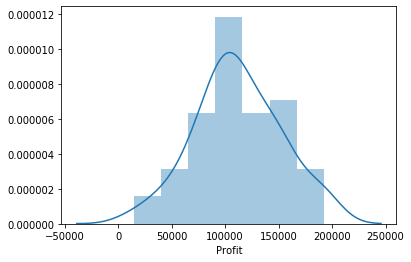

In [9]:
sns.distplot(dataset['Profit'])

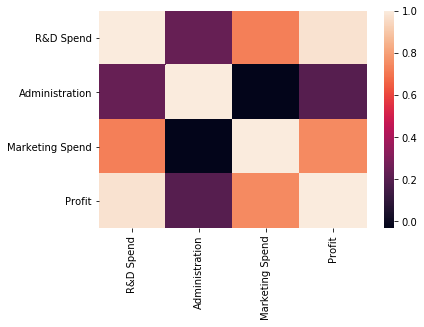

In [10]:
sns.heatmap(dataset.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

### X and y arrays

In [11]:
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [12]:
y = dataset['Profit']

### Encoding categorical data

In [13]:
state = pd.get_dummies(X['State'], drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [14]:
X.drop(['State'], axis=1, inplace=True)

In [15]:
X = pd.concat([X, state], axis=1)

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


# Building a Regression model

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [22]:
y_predict = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

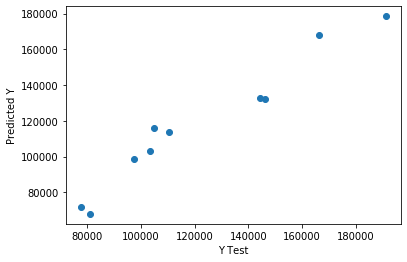

In [23]:
plt.scatter(y_test, y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Building the optimal model using Backward Elimination

In [24]:
import statsmodels.formula.api as sm

In [25]:
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [26]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

In [27]:
model_OLS = sm.OLS(endog = y, exog = X_opt).fit()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [ ]:
model_OLS.summary()

In [ ]:
X_opt = X[:, [0, 1, 2, 3, 4]]
model_OLS = sm.OLS(endog = y, exog = X_opt).fit()
model_OLS.summary()

In [ ]:
X_opt = X[:, [0, 1, 2, 3]]
model_OLS = sm.OLS(endog = y, exog = X_opt).fit()
model_OLS.summary()

In [ ]:
X_opt = X[:, [0, 1, 3]]
model_OLS = sm.OLS(endog = y, exog = X_opt).fit()
model_OLS.summary()

In [ ]:
X_opt = X[:, [0, 1]]
model_OLS = sm.OLS(endog = y, exog = X_opt).fit()
model_OLS.summary()

In [ ]:
X_train = X_train[['R&D Spend']]
X_test = X_test[['R&D Spend']]

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

In [ ]:
y_predict2 = model2.predict(X_test)

In [ ]:
plt.scatter(y_test, y_predict2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')